In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training for Eyes

In [6]:
eye_class_names = ["Closed", "Open"]

train_path = "eye-data/train"
valid_path = "eye-data/valid"
test_path = "eye-data/test"

In [7]:
data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

train_data = data_gen.flow_from_directory(directory=train_path, target_size=(100, 100), classes=eye_class_names, batch_size=5)
valid_data = data_gen.flow_from_directory(directory=valid_path, target_size=(100, 100), classes=eye_class_names, batch_size=5)
test_data = data_gen.flow_from_directory(directory=test_path, target_size=(100, 100), classes=eye_class_names, batch_size=5, shuffle=False)

Found 1234 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


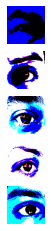

In [8]:
imgs, labels = next(train_data)
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.axis("off")
    plt.imshow(imgs[i], cmap=plt.cm.binary)
print(labels)

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=32, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=16, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(layers.Dense(units=2, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 40000)             0         
                                                                 
 dropout (Dropout)           (None, 40000)             0

In [11]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [13]:
history = model.fit(x=train_data, validation_data=valid_data, epochs=10, verbose=2)

Epoch 1/10
247/247 - 9s - loss: 0.5293 - accuracy: 0.9384 - val_loss: 0.5118 - val_accuracy: 0.9495 - 9s/epoch - 35ms/step
Epoch 2/10
247/247 - 9s - loss: 0.4831 - accuracy: 0.9538 - val_loss: 0.4700 - val_accuracy: 0.9312 - 9s/epoch - 35ms/step
Epoch 3/10
247/247 - 9s - loss: 0.4516 - accuracy: 0.9587 - val_loss: 0.4497 - val_accuracy: 0.9633 - 9s/epoch - 35ms/step
Epoch 4/10
247/247 - 9s - loss: 0.4306 - accuracy: 0.9514 - val_loss: 0.4659 - val_accuracy: 0.9495 - 9s/epoch - 35ms/step
Epoch 5/10
247/247 - 9s - loss: 0.4004 - accuracy: 0.9660 - val_loss: 0.4457 - val_accuracy: 0.9450 - 9s/epoch - 35ms/step
Epoch 6/10
247/247 - 9s - loss: 0.3604 - accuracy: 0.9716 - val_loss: 0.4038 - val_accuracy: 0.9679 - 9s/epoch - 35ms/step
Epoch 7/10
247/247 - 10s - loss: 0.3550 - accuracy: 0.9684 - val_loss: 0.3861 - val_accuracy: 0.9725 - 10s/epoch - 39ms/step
Epoch 8/10
247/247 - 9s - loss: 0.3237 - accuracy: 0.9716 - val_loss: 0.3790 - val_accuracy: 0.9495 - 9s/epoch - 35ms/step
Epoch 9/10
247

In [14]:
predictions = model.predict(x=test_data, verbose=0)
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [15]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

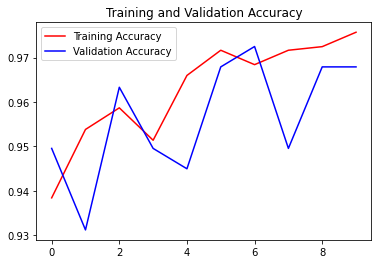

In [16]:
# Plot training and validation accuracy per epoch
plt.plot(epochs, accuracy, 'r', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation Accuracy")
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

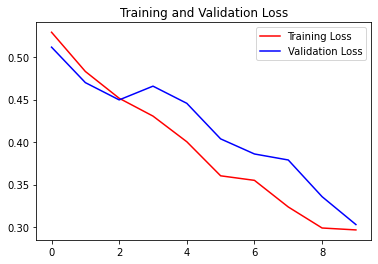

In [17]:
# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [18]:
cm = confusion_matrix(y_true=test_data.classes, y_pred=np.argmax(predictions, axis=-1))

In [19]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.winter):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="red" if cm[i, j] > thresh else "white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[76  4]
 [ 2 78]]


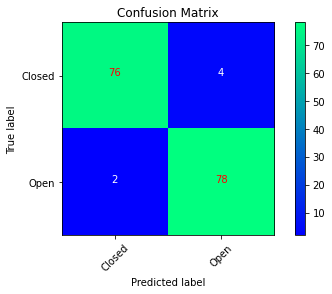

In [20]:
plot_confusion_matrix(cm=cm, classes=eye_class_names, title="Confusion Matrix")

In [21]:
model.save("/content/drive/MyDrive/Colab Notebooks/eye-model.h5")

# Training for Yawns

In [22]:
yawn_class_names = ["no_yawn", "yawn"]

train_path = "yawn-data/train"
valid_path = "yawn-data/valid"
test_path = "yawn-data/test"


In [23]:
data_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

train_data = data_gen.flow_from_directory(directory=train_path, target_size=(400, 600), classes=yawn_class_names, batch_size=20)
valid_data = data_gen.flow_from_directory(directory=valid_path, target_size=(400, 600), classes=yawn_class_names, batch_size=20)
test_data = data_gen.flow_from_directory(directory=test_path, target_size=(400, 600), classes=yawn_class_names, batch_size=20, shuffle=False)


Found 1232 images belonging to 2 classes.
Found 204 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


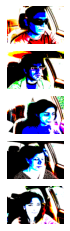

In [24]:
imgs, labels = next(train_data)
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.axis("off")
    plt.imshow(imgs[i], cmap=plt.cm.binary)
print(labels)


In [25]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(400, 600, 3)))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=32, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=16, activation='relu', kernel_regularizer='l2', bias_regularizer='l2'))
model.add(layers.Dense(units=2, activation='softmax'))


In [26]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 400, 600, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 200, 300, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 200, 300, 64)      18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 150, 64)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 960000)            0         
                                                                 
 dropout_2 (Dropout)         (None, 960000)           

In [27]:
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])


In [28]:
history = model.fit(x=train_data, validation_data=valid_data, epochs=10, verbose=2)


Epoch 1/10
62/62 - 163s - loss: 18.5604 - accuracy: 0.5812 - val_loss: 2.8454 - val_accuracy: 0.6275 - 163s/epoch - 3s/step
Epoch 2/10
62/62 - 25s - loss: 2.9445 - accuracy: 0.6916 - val_loss: 1.2825 - val_accuracy: 0.7941 - 25s/epoch - 399ms/step
Epoch 3/10
62/62 - 25s - loss: 1.2732 - accuracy: 0.8182 - val_loss: 0.9925 - val_accuracy: 0.8873 - 25s/epoch - 402ms/step
Epoch 4/10
62/62 - 25s - loss: 0.9943 - accuracy: 0.8888 - val_loss: 0.9822 - val_accuracy: 0.9216 - 25s/epoch - 399ms/step
Epoch 5/10
62/62 - 25s - loss: 0.9159 - accuracy: 0.9205 - val_loss: 0.8835 - val_accuracy: 0.9559 - 25s/epoch - 401ms/step
Epoch 6/10
62/62 - 25s - loss: 0.8710 - accuracy: 0.9237 - val_loss: 0.9999 - val_accuracy: 0.9069 - 25s/epoch - 401ms/step
Epoch 7/10
62/62 - 25s - loss: 0.8682 - accuracy: 0.9261 - val_loss: 0.8888 - val_accuracy: 0.9412 - 25s/epoch - 406ms/step
Epoch 8/10
62/62 - 25s - loss: 0.8141 - accuracy: 0.9359 - val_loss: 0.8440 - val_accuracy: 0.9559 - 25s/epoch - 408ms/step
Epoch 9/

In [29]:
predictions = model.predict(x=test_data, verbose=0)
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [30]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

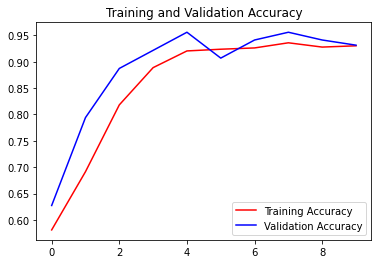

In [31]:
# Plot training and validation accuracy per epoch
plt.plot(epochs, accuracy, 'r', label="Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation Accuracy")
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

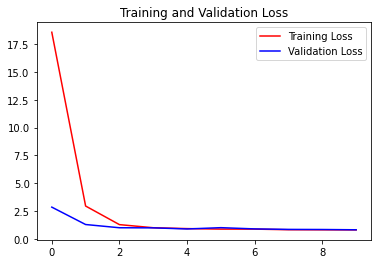

In [32]:

# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


Confusion matrix, without normalization
[[76  4]
 [ 2 78]]


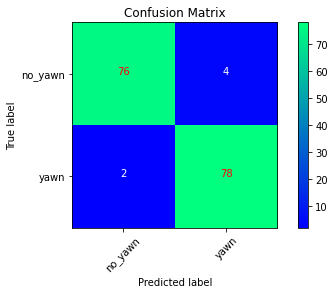

In [33]:
plot_confusion_matrix(cm=cm, classes=yawn_class_names, title="Confusion Matrix")

In [34]:
model.save("/content/drive/MyDrive/Colab Notebooks/yawn-model.h5")